In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH = 'data/P/'

base = pd.read_csv(PATH + 'price_housebase.tsv', sep='\t')
train = pd.read_csv(PATH + 'price_train.tsv', sep='\t')
test = pd.read_csv(PATH + 'price_test.tsv', sep='\t')
sample = pd.read_csv(PATH + 'price_sample_submission.tsv', sep='\t')

In [35]:
keys = set(base['city_quadkey']).union(set(train['city_quadkey']))
kd = pd.DataFrame(pd.Series(list(keys), name='quadkeys'))

district_cols = ['beauty_cnt', 'shopping_cnt', 'cafe_restaurant_eating_out_cnt', 'entertainment_cnt',
                'sport_cnt', 'chain_cnt', 'groceries_and_everyday_items_cnt', 'art_cnt', 'healthcare_cnt',
                'laundry_and_repair_services_cnt']

house_cols = ['building_series_id', 'flats_count', 'building_type', 'unified_address', 
             'expect_demolition', 'latitude', 'longitude', 'ceiling_height', 'has_elevator',
             'build_year']

bd = base[district_cols + ['city_quadkey']].set_index('city_quadkey').drop_duplicates()

joint = kd.join(bd, on='quadkeys')

In [36]:
to_rm = ['avg_price_sqm', 'month', 'city_quadkey', 'median_price_sqm']
feats = list(train.columns)
for el in to_rm:
    feats.remove(el)
    
mean = train.groupby('city_quadkey')[feats].mean()
joint = joint.join(mean, on='quadkeys').set_index('quadkeys')

In [48]:
pd.set_option('max_columns', None)
base.head()

,beauty_cnt,building_id,building_series_id,shopping_cnt,flats_count,latitude,building_type,cafe_restaurant_eating_out_cnt,unified_address,entertainment_cnt,sport_cnt,chain_cnt,groceries_and_everyday_items_cnt,art_cnt,site_id,healthcare_cnt,expect_demolition,longitude,ceiling_height,has_elevator,laundry_and_repair_services_cnt,build_year,city_quadkey
0,36.0,3031030817531317628,0,45.0,0,55.705219,BRICK,24.0,"Россия, Москва, 1-й Автозаводский проезд, 3",18.0,13.0,127.0,32.0,7.0,0,16.0,False,37.656994,0.00,True,38.0,1937,120310101302011
1,36.0,3031030817531317630,0,45.0,0,55.704845,BRICK,24.0,"Россия, Москва, 1-й Автозаводский проезд, 5",18.0,13.0,127.0,32.0,7.0,0,16.0,False,37.657295,0.00,False,38.0,1962,120310101302011
2,36.0,1764947998512909470,0,45.0,0,55.704697,UNKNOWN,24.0,"Россия, Москва, 1-й Автозаводский проезд, 7/1",18.0,13.0,127.0,32.0,7.0,0,16.0,False,37.658203,0.00,False,38.0,0,120310101302011
3,6.0,2614890160181791580,1564812,23.0,176,55.811642,BRICK,11.0,"Россия, Москва, 1-й Амбулаторный проезд, 2",16.0,5.0,60.0,25.0,4.0,0,14.0,False,37.535599,2.65,True,25.0,1967,120310101031222
4,6.0,4152249910202725078,1564812,23.0,60,55.810810,BRICK,11.0,"Россия, Москва, 1-й Амбулаторный проезд, 5к1",16.0,5.0,60.0,25.0,4.0,0,14.0,False,37.534649,0.00,False,25.0,1959,120310101031222


In [21]:
joint

,quadkeys,beauty_cnt,shopping_cnt,cafe_restaurant_eating_out_cnt,entertainment_cnt,sport_cnt,chain_cnt,groceries_and_everyday_items_cnt,art_cnt,healthcare_cnt,laundry_and_repair_services_cnt
0,120132323213322,0.0,3.0,0.0,1.0,1.0,1.0,2.0,4.0,1.0,1.0
1,120310101213200,32.0,29.0,11.0,7.0,9.0,111.0,19.0,12.0,17.0,37.0
2,120310101213201,28.0,36.0,6.0,16.0,13.0,63.0,12.0,5.0,16.0,15.0
3,120310101213202,13.0,14.0,1.0,5.0,7.0,50.0,14.0,8.0,17.0,12.0
4,120310101213203,10.0,7.0,9.0,7.0,3.0,33.0,13.0,4.0,16.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
7947,120310103310302,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
7948,120310103310303,0.0,0.0,0.0,8.0,0.0,2.0,1.0,2.0,0.0,3.0
7949,120310103310312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7950,120132233101300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
base.head()

,beauty_cnt,building_id,building_series_id,shopping_cnt,flats_count,latitude,building_type,cafe_restaurant_eating_out_cnt,unified_address,entertainment_cnt,...,art_cnt,site_id,healthcare_cnt,expect_demolition,longitude,ceiling_height,has_elevator,laundry_and_repair_services_cnt,build_year,city_quadkey
0,36.0,3031030817531317628,0,45.0,0,55.705219,BRICK,24.0,"Россия, Москва, 1-й Автозаводский проезд, 3",18.0,...,7.0,0,16.0,False,37.656994,0.00,True,38.0,1937,120310101302011
1,36.0,3031030817531317630,0,45.0,0,55.704845,BRICK,24.0,"Россия, Москва, 1-й Автозаводский проезд, 5",18.0,...,7.0,0,16.0,False,37.657295,0.00,False,38.0,1962,120310101302011
2,36.0,1764947998512909470,0,45.0,0,55.704697,UNKNOWN,24.0,"Россия, Москва, 1-й Автозаводский проезд, 7/1",18.0,...,7.0,0,16.0,False,37.658203,0.00,False,38.0,0,120310101302011
3,6.0,2614890160181791580,1564812,23.0,176,55.811642,BRICK,11.0,"Россия, Москва, 1-й Амбулаторный проезд, 2",16.0,...,4.0,0,14.0,False,37.535599,2.65,True,25.0,1967,120310101031222
4,6.0,4152249910202725078,1564812,23.0,60,55.810810,BRICK,11.0,"Россия, Москва, 1-й Амбулаторный проезд, 5к1",16.0,...,4.0,0,14.0,False,37.534649,0.00,False,25.0,1959,120310101031222


In [6]:
got = set(base['city_quadkey'])

In [8]:
set(train['city_quadkey']).difference(got)

set()

In [5]:
keys = set(base['city_quadkey']).union(set(train['city_quadkey'])).union(test['city_quadkey'])

In [29]:
key_data = pd.DataFrame(index=keys)

In [12]:
train['city_quadkey'].value_counts().describe()

count    7097.000000
mean       23.393969
std        11.468626
min         1.000000
25%        13.000000
50%        32.000000
75%        32.000000
max        32.000000
Name: city_quadkey, dtype: float64

In [20]:
pd.set_option('display.max_columns', None)

In [26]:
district_cols = ['beauty_cnt', 'shopping_cnt', 'cafe_restaurant_eating_out_cnt', 'entertainment_cnt',
                'sport_cnt', 'chain_cnt', 'groceries_and_everyday_items_cnt', 'art_cnt', 'healthcare_cnt',
                'laundry_and_repair_services_cnt']

house_cols = ['building_series_id', 'flats_count', 'building_type', 'unified_address', 
             'expect_demolition', 'latitude', 'longitude', 'ceiling_height', 'has_elevator',
             'build_year']

In [31]:
bd = base[district_cols + ['city_quadkey']].set_index('city_quadkey')
bd.head()

,beauty_cnt,shopping_cnt,cafe_restaurant_eating_out_cnt,entertainment_cnt,sport_cnt,chain_cnt,groceries_and_everyday_items_cnt,art_cnt,healthcare_cnt,laundry_and_repair_services_cnt
city_quadkey,,,,,,,,,,
120310101302011,36.0,45.0,24.0,18.0,13.0,127.0,32.0,7.0,16.0,38.0
120310101302011,36.0,45.0,24.0,18.0,13.0,127.0,32.0,7.0,16.0,38.0
120310101302011,36.0,45.0,24.0,18.0,13.0,127.0,32.0,7.0,16.0,38.0
120310101031222,6.0,23.0,11.0,16.0,5.0,60.0,25.0,4.0,14.0,25.0
120310101031222,6.0,23.0,11.0,16.0,5.0,60.0,25.0,4.0,14.0,25.0


In [33]:
kd = pd.DataFrame(pd.Series(list(keys), name='quadkeys'))

In [56]:
joint = kd.join(bd, on='quadkeys')

In [55]:
bd = bd.drop_duplicates()

In [37]:
train.head()

,apartment_ratio,offers_in_sites_ratio,unique_active_buildings_count,avg_price_sqm,month,unique_active_building_series_count,rooms_offered_3_ratio,city_quadkey,median_price_sqm,rooms_offered_4_more_ratio,rooms_offered_1_ratio,total_area_avg,studio_ratio,offer_count,rooms_offered_2_ratio
0,0.0,0.0,1,22727.273438,2018-02-01,1,0.0,120132230303223,22727.273438,0.0,0.0,44.0,0.0,1,1.0
1,0.0,0.0,1,22727.273438,2018-03-01,1,0.0,120132230303223,22727.273438,0.0,0.0,44.0,0.0,1,1.0
2,0.0,0.0,1,43478.261719,2018-06-01,1,0.0,120132230332230,43478.261719,0.0,1.0,34.5,0.0,1,0.0
3,0.0,0.0,1,43478.261719,2018-07-01,1,0.0,120132230332230,43478.261719,0.0,1.0,34.5,0.0,1,0.0
4,0.0,0.0,1,36250.000000,2017-01-01,1,1.0,120132231322113,35714.285156,0.0,0.0,56.0,0.0,3,0.0


In [42]:
to_rm = ['avg_price_sqm', 'month', 'city_quadkey', 'median_price_sqm']
feats = list(train.columns)
for el in to_rm:
    feats.remove(el)

In [44]:
mean = train.groupby('city_quadkey')[feats].mean()

In [58]:
joint = joint.join(mean, on='quadkeys')

In [60]:
test

,month,city_quadkey
0,2020-03-01,120132230323210
1,2019-09-01,120132231322113
2,2019-10-01,120132231322113
3,2019-11-01,120132231322113
4,2019-12-01,120132231322113
...,...,...
38025,2019-11-01,120311020100310
38026,2019-12-01,120311020100310
38027,2020-01-01,120311020100310
38028,2020-02-01,120311020100310


In [41]:
real_train = train[['month', 'city_quadkey']]
real_train = real_train.join(joint, on='city_quadkey')
real_train['month_id'] = real_train['month'].apply(pd.to_datetime).apply(lambda x: x.month)
real_train.drop(['month', 'city_quadkey'], axis=1, inplace=True)

In [65]:
real_train = train[['month', 'city_quadkey']]

In [66]:
real_train = real_train.join(joint.set_index('quadkeys'), on='city_quadkey')
real_test = test.join(joint.set_index('quadkeys'), on='city_quadkey')

In [72]:
real_train['month_id'] = real_train['month'].apply(pd.to_datetime).apply(lambda x: x.month)
real_test['month_id'] = real_test['month'].apply(pd.to_datetime).apply(lambda x: x.month)

In [74]:
real_train.drop(['month', 'city_quadkey'], axis=1, inplace=True)
real_test.drop(['month', 'city_quadkey'], axis=1, inplace=True)

In [78]:
import xgboost
model = xgboost.XGBRegressor()
model.fit(real_train, train['avg_price_sqm'])

[13:45:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [79]:
res = model.predict(real_test)

In [82]:
sample['avg_price_sqm'] = res

In [93]:
import numpy as np

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [94]:
mape(train['avg_price_sqm'], model.predict(real_train))

27.727637824687818

In [85]:
sample

,month,city_quadkey,avg_price_sqm
0,2020-03-01,120132230323210,57220.042969
1,2019-09-01,120132231322113,56955.140625
2,2019-10-01,120132231322113,56955.140625
3,2019-11-01,120132231322113,56955.140625
4,2019-12-01,120132231322113,56955.140625
...,...,...,...
38025,2019-11-01,120311020100310,46813.457031
38026,2019-12-01,120311020100310,46813.457031
38027,2020-01-01,120311020100310,46813.457031
38028,2020-02-01,120311020100310,46813.457031


In [84]:
sample.to_csv('data/first.tsv', index=False, sep='\t')

In [21]:
base[base['city_quadkey'] == 120310101211103][:4]

,beauty_cnt,building_id,building_series_id,shopping_cnt,flats_count,latitude,building_type,cafe_restaurant_eating_out_cnt,unified_address,entertainment_cnt,sport_cnt,chain_cnt,groceries_and_everyday_items_cnt,art_cnt,site_id,healthcare_cnt,expect_demolition,longitude,ceiling_height,has_elevator,laundry_and_repair_services_cnt,build_year,city_quadkey
36135,89.0,2758139288968364454,1564812,113.0,24,55.745602,BRICK,45.0,"Россия, Москва, Большой Власьевский переулок, 10",23.0,15.0,194.0,37.0,91.0,0,42.0,False,37.591663,2.8,True,61.0,1927,120310101211103
36136,89.0,2758139288968364453,0,113.0,0,55.746349,BRICK,45.0,"Россия, Москва, Большой Власьевский переулок, 11",23.0,15.0,194.0,37.0,91.0,0,42.0,False,37.589848,0.0,False,61.0,1937,120310101211103
36137,89.0,2758139288968364452,1564812,113.0,17,55.745819,BRICK,45.0,"Россия, Москва, Большой Власьевский переулок, 12",23.0,15.0,194.0,37.0,91.0,0,42.0,False,37.591263,0.0,True,61.0,1981,120310101211103
36138,89.0,2758139288968364450,1564812,113.0,0,55.746422,BRICK,45.0,"Россия, Москва, Большой Власьевский переулок, 14",23.0,15.0,194.0,37.0,91.0,0,42.0,False,37.591026,0.0,True,61.0,0,120310101211103


In [60]:
monthly = train.groupby(['city_quadkey', 'month']).mean()

In [61]:
monthly

apartment_ratio  offers_in_sites_ratio  \
city_quadkey    month                                                
120132230303223 2018-02-01              0.0                    0.0   
                2018-03-01              0.0                    0.0   
120132230332230 2018-06-01              0.0                    0.0   
                2018-07-01              0.0                    0.0   
120132231322113 2017-01-01              0.0                    0.0   
...                                     ...                    ...   
120311020100310 2019-04-01              0.0                    0.0   
                2019-05-01              0.0                    0.0   
                2019-06-01              0.0                    0.0   
                2019-07-01              0.0                    0.0   
                2019-08-01              0.0                    0.0   

                            unique_active_buildings_count  avg_price_sqm  \
city_quadkey    month                                                      
120132230303223 2018-02-01                              1   22727.273438   
                2018-03-01                              1   22727.273438   
120132230332230 2018-06-01                              1   43478.261719   
                2018-07-01                              1   43478.261719   
120132231322113 2017-01-01                              1   36250.000000   
...                                                   ...            ...   
120311020100310 2019-04-01                              9   18744.729749   
                2019-05-01                              9   19055.593378   
                2019-06-01                              9   19081.275263   
                2019-07-01                             10   19047.505127   
                2019-08-01                             10   19047.505127   

                            unique_active_building_series_count  \
city_quadkey    month                                             
120132230303223 2018-02-01                                    1   
                2018-03-01                                    1   
120132230332230 2018-06-01                                    1   
                2018-07-01                                    1   
120132231322113 2017-01-01                                    1   
...                                                         ...   
120311020100310 2019-04-01                                    1   
                2019-05-01                                    1   
                2019-06-01                                    1   
                2019-07-01                                    1   
                2019-08-01                                    1   

                            rooms_offered_3_ratio  median_price_sqm  \
city_quadkey    month                                                 
120132230303223 2018-02-01               0.000000      22727.273438   
                2018-03-01               0.000000      22727.273438   
120132230332230 2018-06-01               0.000000      43478.261719   
                2018-07-01               0.000000      43478.261719   
120132231322113 2017-01-01               1.000000      35714.285156   
...                                           ...               ...   
120311020100310 2019-04-01               0.052632      18478.261719   
                2019-05-01               0.047619      18750.000000   
                2019-06-01               0.043478      18750.000000   
                2019-07-01               0.041667      18614.130859   
                2019-08-01               0.041667      18614.130859   

                            rooms_offered_4_more_ratio  rooms_offered_1_ratio  \
city_quadkey    month                                                           
120132230303223 2018-02-01                         0.0               0.000000   
                2018-03-01                         0.0               0.000000   
12013223

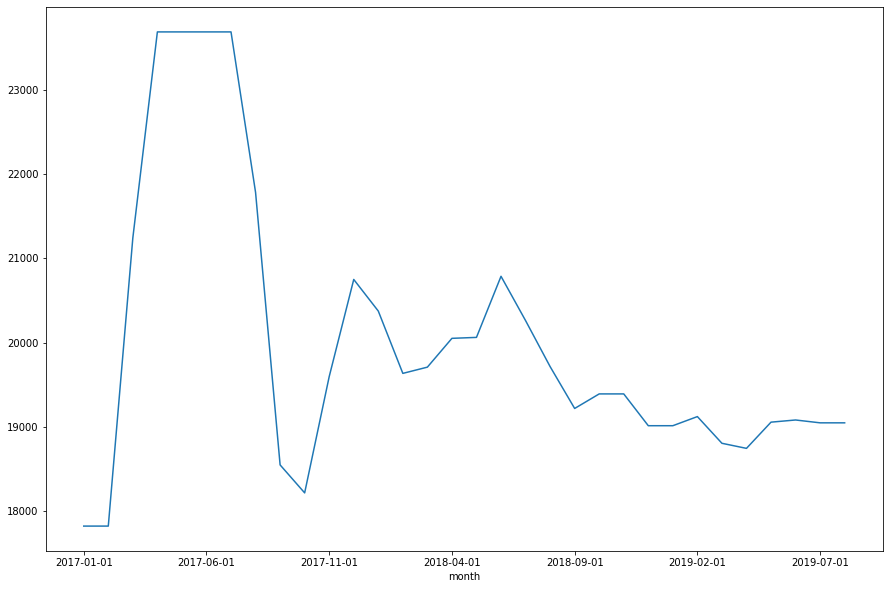

In [64]:
plt.figure(figsize=(15, 10))
monthly.loc[120311020100310]['avg_price_sqm'].plot()